In [3]:
r = a[3047]
print r[5]
print re.split('[0-9]',r[5])
print [i for i in re.split('[0-9]',r[5]) if len(i) > 0]

zip(re.split('[A-Z]',r[5]),[i for i in re.split('[0-9]',r[5]) if len(i) > 0])

58M181N42M
['', '', 'M', '', '', 'N', '', 'M']
['M', 'N', 'M']


[('58', 'M'), ('181', 'N'), ('42', 'M')]

In [210]:
#read sam
#find split
#get 5' of sj
#get 3' of sj

#NOTES
#Soft Clip wont change POS

import re
from tqdm import *
def get_n_len(cigar):
    ''' '''
    n = re.findall('[0-9]*N',cigar)
    n = [int(i.replace('N','')) for i in n]
    return n
def get_low_comp(seq):
    ''' '''
    thresh = len(seq)/2
    
    for i in 'ATCG':
        for j in 'ATCG':
            if seq.count(''.join([i,j]))*2 > thresh:
               # print 'Too many {}'.format(''.join([i,j]))
                return True
    return False

print get_low_comp('ACTCTGTGTGTGTGTGTGTGAGAGAGAGAGAGAGAGTGAATGAGAGGGAAC')

a = [i.strip().split('\t') for i in open('E-MTAB-4052/ERR1138639Aligned.out.sam').readlines() if i[0] != '@']
mapleft = [float(i[3]) for i in a]
first_map = int(min([i for i in mapleft if mapleft.count(i) > 10]))
last_map = int(max([i for i in mapleft if mapleft.count(i) > 10 and i < 4500]))
a = [i for i in a if (len(re.findall('[0-9]*N',i[5]))) > 0] #get split
a = [i for i in a if any(n > 2 for n in get_n_len(i[5]))] #split is less likely to be error
print len(a)
b = [i for i in a if get_low_comp(i[9]) == True]
a = [i for i in a if get_low_comp(i[9]) == False]
print len(a)
#a gets readsa withsplit 

class Split:
    
    def __init__(self, sam_line):
        ''' '''
        self.cigar = sam_line[5]
        self.map_start = int(sam_line[3])
        self.seq = sam_line[9]
        
        cig_lengths = [int(i) for i in re.split('[A-Z]',self.cigar) if len(i) > 0]
        cig_sects = [i for i in re.split('[0-9]',self.cigar) if len(i) > 0]
        self.cig_seq = zip(cig_lengths,cig_sects)
        
    def rm_sclip(self):
        ''' '''
        pass
    
    def get_5(self):
        ''' '''
        maps = []
        offset = 0
        for i in self.cig_seq:
            if i[1] == 'S':
                pass
            if i[1] == 'M':
                maps.append((self.map_start+offset,self.map_start+offset+i[0]))
            else:
                offset += i[0]
        return tuple(maps[0])
    
    def get_3(self):
        ''' '''
        maps = []
        offset = 0
        for i in self.cig_seq:
            if i[1] == 'S':
                pass
            if i[1] == 'M':
                maps.append((self.map_start+offset,self.map_start+offset+i[0]))
            else:
                offset += i[0]
        return tuple(maps[-1])
                
        
splice_sites5 = [last_map]
splice_sites3 = [first_map]
for i in tqdm_notebook(a):
    tc = Split(i)
    maps5 = tc.get_5()
    splice_sites5.append(maps5[1])
    maps3 = tc.get_3()
    splice_sites3.append(maps3[0])
    
 

False
9897
9872



In [324]:
thresh = 0.001

splice_sitess5 = sorted(set(splice_sites5))
print splice_sitess5
splice_sitcount5 = []
for i in splice_sitess5:    
    fract = splice_sites5.count(i)/float(len(splice_sites5))
    if fract < thresh/10:
        fract = 0.0
    splice_sitcount5.append(fract)
splice_sitcount5[-1] = 0.01

splice_sitess3 = sorted(set(splice_sites3))
print len(splice_sitess3)
splice_sitcount3 = []
for i in splice_sitess3:
    fract = splice_sites3.count(i)/float(len(splice_sites3))
    if fract < thresh:
        fract = 0.0
    splice_sitcount3.append(fract)
splice_sitcount3[0] = 0.01
    
print splice_sitess3[:4]
print splice_sitess5[:4]
print splice_sitcount3[:4]
print splice_sitcount5[:4]
'''
splice_peaks3 = []
splice_dict_3 = {i[0]:i[1] for i in zip(splice_sites3,splice_sitcount3)}
for i in range(max(splice_sites3)):
    try:
        splice_peaks3.append(splice_dict_3[i])
    except:
        splice_peaks3.append(0)

#print splice_peaks3

import numpy as np
from scipy.signal import find_peaks_cwt
cb = np.array(splice_peaks3)
indexes = find_peaks_cwt(cb, np.arange(1, 550))
print indexes
#pl.plot(splice_sitess5,splice_sitcount5,'.')
print sorted(splice_sites3)[:10]
for i in indexes:
    pl.vlines(i, 0,0.02)
pl.plot(splice_sitess3,splice_sitcount3,'.')
'''

[242, 420, 753, 1107, 1166, 1176, 1208, 1210, 1212, 1240, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1261, 1262, 1263, 1265, 1266, 1267, 1268, 1269, 1271, 1272, 1273, 1274, 1275, 1277, 1278, 1280, 1281, 1282, 1283, 1285, 1324, 1734, 1736, 1744, 1759, 1760, 1761, 1762, 1763, 1764, 1767, 1771, 1772, 1774, 1778, 1779, 1780, 1788, 1790, 1896, 2019, 2031, 2036, 2037, 2038, 2041, 2044, 2057, 2064, 2065, 2066, 2067, 2068, 2070, 2072, 2073, 2074, 2075, 2077, 2078, 2081, 2084, 2086, 2089, 2092, 2759, 3406, 3529, 3565, 3592, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3617, 3619, 3620, 3621, 3624, 3626, 3628, 3630, 3633, 3634, 3875, 3893, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3924, 3925, 3926, 3927, 3928, 3929, 3938, 3939, 4052]
463
[1148, 1170, 1461, 1463]
[242, 420, 753, 1107]
[0.01, 0.0, 0.0, 0.0]
[0.00010128633647320976, 0.00010128633647320976, 0.00010128633647320976, 0.0016205813835713562]


"\nsplice_peaks3 = []\nsplice_dict_3 = {i[0]:i[1] for i in zip(splice_sites3,splice_sitcount3)}\nfor i in range(max(splice_sites3)):\n    try:\n        splice_peaks3.append(splice_dict_3[i])\n    except:\n        splice_peaks3.append(0)\n\n#print splice_peaks3\n\nimport numpy as np\nfrom scipy.signal import find_peaks_cwt\ncb = np.array(splice_peaks3)\nindexes = find_peaks_cwt(cb, np.arange(1, 550))\nprint indexes\n#pl.plot(splice_sitess5,splice_sitcount5,'.')\nprint sorted(splice_sites3)[:10]\nfor i in indexes:\n    pl.vlines(i, 0,0.02)\npl.plot(splice_sitess3,splice_sitcount3,'.')\n"

In [325]:

import numpy
def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def get_splice_sites(sites, count, right=False, left=False):

    data = sorted([i for i in zip(sites, count) if i[1] != 0], key=lambda x: x[0])
    
    data = {i[0]:i[1] for i in data}
    
    r_av = int(len([i for i in data.items() if i[1] != 0.0])*0.3)
    if r_av < 1:
        r_av = 1
    data2 = []
    for i in range(max([k for k in data.keys()])+1):
        try:
            data2.append([i,data[i]])
        except:
            data2.append([i,0])
    print data2
    data3 = list(running_mean([i[1] for i in data2],r_av))
    print data3
    data3.append(0)
    splice_sites = {}
    c = 0
    #if right:
    #    splice_sites[c] = [right, right]
    #    c += 1
    ins = 0

    for i in range(len(data3)):
        
        if data3[i] == 0:
            if ins == 1:
                splice_sites[c].append(i-1)
                ins = 0
                c += 1
            continue
        else:
            if ins == 0:
                splice_sites[c] = [i]
                ins = 1
                continue
    #if left:
    #    splice_sites[c] = [left, left]
    return splice_sites
ss3 = get_splice_sites(splice_sites3, splice_sitcount3, right=first_map)           
ss5 = get_splice_sites(splice_sites5, splice_sitcount5, left =last_map)

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 0], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 0], [91, 0], [92, 0], [93, 0], [94, 0], [95, 0], [96, 0], [97, 0], [98, 0], [99, 0], [100, 0], [101, 0], [102, 0], [103, 0], [104, 0], [105, 0], [106, 0], [107, 0], [108, 0], [109, 0], [110, 0],

----3---exon---5---intron---3---exon---5----

take from first 3 following 5


In [326]:
print ss3, 'acceptors','exon_start'
print ss5, 'donors','exon_stop'
print len(splice_sites5)
print len(splice_sitcount5)

{0: [1097, 1148], 1: [1412, 1548], 2: [1814, 1951], 3: [3364, 3500], 4: [3641, 3809], 5: [3898, 3983]} acceptors exon_start
{0: [1251, 1255], 1: [1257, 1259], 2: [1757, 1759], 3: [1761, 1763], 4: [2062, 2064], 5: [3601, 3603], 6: [3904, 3906], 7: [3908, 3910], 8: [4050, 4050]} donors exon_stop
9873
136


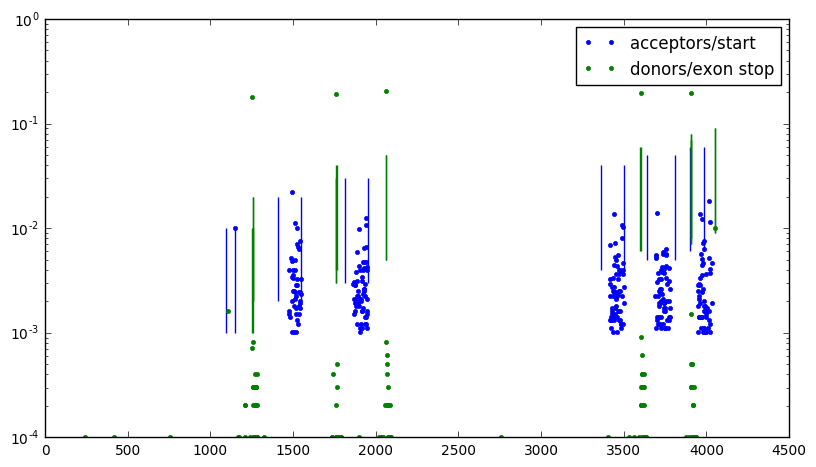

In [327]:
pl.rcParams['figure.figsize'] = 16*0.6, 9*0.6
pl.plot(splice_sitess3,splice_sitcount3,'.', color='blue', label = 'acceptors/start')
pl.plot(splice_sitess5,splice_sitcount5,'.', color='green', label='donors/exon stop')
pl.yscale('log')
c = 1
for i in range(6):
    pl.vlines(ss3[i][0],0.001*c,0.01*c,colors='blue')
    pl.vlines(ss3[i][1],0.001*c,0.01*c,colors='blue')
    c+=1
c = 1
for i in range(9):
    pl.vlines(ss5[i][0],0.001*c,0.01*c,colors='green')
    pl.vlines(ss5[i][1],0.001*c,0.01*c,colors='green')
    c+=1
pl.xlim(000,4500)
pl.legend()

In [242]:
class Intron:
    ''' '''
    def __init__(self,pos5,pos3,seq,bounds):
        self.pos5 = pos5
        self.pos3 = pos3
        self.boundaries = bounds
        self.seq = seq[bounds[0]:bounds[1]]
    def __str__(self):
        ''' '''
        return '{} {}\n{}\n'.format(self.pos5, self.pos3, self.seq)
def get_introns(site_dict_5, site_dict_3, sites_5, sites_3, seq):
    '''
    site dict5: no of INTRON, ragne of 5' part of intron (3'-right part of exon) 
    site dict3: no of INTRON, ragne of 3' part of intron (5'-left part of exon)
    sites5: positions of 5' part of intron (3'-right of exon)
    sites3: positions of 3' part of intron (5'-left of exon)
    '''
    sites = set()
    for left in site_dict_5.items():
        for right in site_dict_3.items(): #pairs intron5start-intron3end
            if left[1][1] >= right[1][0]: #if start is > than end 
                continue
            print left[0], right[0]
            for l_pos in set(sites_5):
                if l_pos >= left[1][0] and l_pos <= left[1][1]:
                    for r_pos in set(sites_3):
                        if r_pos >= right[1][0] and r_pos <= right[1][1]:

                            sites.add(Intron(left[0],right[0],seq,[l_pos,r_pos]))
    return sites

In [243]:
seq = ''.join([i.strip() for i in open('rarr2_mouse.fa') if i[0] != '>'])
sites = get_introns(ss5, ss3, splice_sites5, splice_sites3, seq)

0 1
0 2
0 3
0 4
0 5
1 1
1 2
1 3
1 4
1 5
2 2
2 3
2 4
2 5
3 2
3 3
3 4
3 5
4 3
4 4
4 5
5 4
5 5


In [247]:
def get_intronome(intron_set, present_introns):
    ''' 
    intronset has all introns
    intronset has all in this combination (first entryis just first intron)
    '''
    right = present_introns[-1].right
    for i in intron_set:
        if right >= i.left:
            present_introns.append(i)
            

0 1
ACCAGAAAGAGGCTGGGGATTTTGGATATGGAGGGAAGACCCAAAAGGAGGAGAAAATGGCTCAGAAAAAAGGCTATAGTGGACATAACCAGCAGGATTACTTCCCGGGGCTGTTGGCAGGGAACTCTAAAACTTTGTTGGCCCCAAAGTTTCTTTGGAAACAAGGCCTTGCAGAATGGGAAGGGCTAGTTGGATACCAATGGAAGGGGTACTTCAGAAAGGGGCACTTCTGTCCCTAGGAGT

0 1
ACCAGAAAGAGGCTGGGGATTTTGGATATGGAGGGAAGACCCAAAAGGAGGAGAAAATGGCTCAGAAAAAAGGCTATAGTGGACATAACCAGCAGGATTACTTCCCGGGGCTGTTGGCAGGGAACTCTAAAACTTTGTTGGCCCCAAAGTTTCTTTGGAAACAAGGCCTTGCAGAATGGGAAGGGCTAGTTGGATACCAATGGAAGGGGTACTTCAGAAAGGGGCACTTCTGTCCC

0 1
ACCAGAAAGAGGCTGGGGATTTTGGATATGGAGGGAAGACCCAAAAGGAGGAGAAAATGGCTCAGAAAAAAGGCTATAGTGGACATAACCAGCAGGATTACTTCCCGGGGCTGTTGGCAGGGAACTCTAAAACTTTGTTGGCCCCAAAGTTTCTTTGGAAACAAGGCCTTGCAGAATGGGAAGGGCTAGTTGGATACCAATGGAAGGGGTACTTCAGAAAGGGGCACTTCTGTCCCTAGGAG

0 1
ACCAGAAAGAGGCTGGGGATTTTGGATATGGAGGGAAGACCCAAAAGGAGGAGAAAATGGCTCAGAAAAAAGGCTATAGTGGACATAACCAGCAGGATTACTTCCCGGGGCTGTTGGCAGGGAACTCTAAAACTTTGTTGGCCCCAAAGTTTCTTTGGAAACAAGGCCTTGCAGAATGGGAAGGGCTAGTTGGATACCAATGGAAGGGGTACTTCAGAAAGGGGCACTTCTGTCCCTAGGA

0 1
ACCAGAAAGA